<a href="https://colab.research.google.com/github/JHWannabe/self-taught_machine_learning_code/blob/main/4%EC%9E%A5_%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.1 로지스틱 회귀

In [1]:
import pandas as pd
import numpy as np
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 어떤 생선이 존재하는지 종만을 따로 출력
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
#이 때 Species열을 타깃으로 하고 나머지 5개열은 입력 데이터로 사용
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

fish_target = fish['Species'].to_numpy()

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
# 최근접이웃
from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target), kn.score(test_scaled, test_target))
print(kn.classes_ )

0.8907563025210085 0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [7]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals = 4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [8]:
# 네번째 샘플의 확률
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


Text(0, 0.5, 'phi')

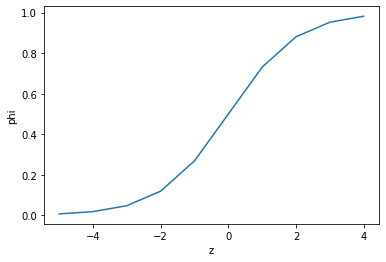

In [9]:
# 로지스틱 함수 그래프 그려보기
import numpy as np
import matplotlib.pyplot as plt 

z = np.arange(-5,5,1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')

In [10]:
# 불리언 인덱싱으로 행 선택하기
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [11]:
## 불리언 인덱싱으로 행 선택하기 으로 도미와 빙어의 행을 골라내겠다.
bream_smelt_indexs = (train_target =='Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [13]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [14]:
# 각각의 확률을 보겠다.

lr.predict_proba(train_bream_smelt[:5])
#첫번째 열이 양성, 두번째 열이 음성
# 번호순이므로 첫번째 열은 0 즉, 음성
# 두번째 열은 1 즉, 양성이다.

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [15]:
# Smelt가 양성임을 알 수 있다.
lr.classes_ 

array(['Bream', 'Smelt'], dtype=object)

In [16]:
# 회귀계수를 보자.
print(lr.coef_ , lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [17]:
# z값을 출력해보자.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [18]:
#이를 시그모이드 함수에 통과시켜보자.
# 여기서는 expit()을 사용하겠다.
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [19]:
#이를 predict_proba 와 비교해보면
lr.predict_proba(train_bream_smelt[:5])

# 즉 decision_funciton은 양성의 z값을 반환해주었다는 것을 알 수 있다.  

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [20]:
# 로지스틱으로 다중 분류 수행하기
lr = LogisticRegression(C=20 , max_iter = 1000)
lr.fit(train_scaled , train_target)
print( lr.score(train_scaled, train_target) , lr.score(test_scaled, test_target))

0.9327731092436975 0.925


In [21]:
# 상위 5개행 예측
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [22]:
# 샘플 5개의 예측 확률 출력
proba = lr.predict_proba(test_scaled[:5])

np.round(proba, decimals=3)

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [23]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [24]:
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [25]:
# z값을 소프트맥스에 통과시키기
from scipy.special import softmax
proba = softmax(decisions, axis = 1 )
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


##4.2 확률적 경사 하강법

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [27]:
# 데이터 프레임 만들기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fishcolumn = fish.columns
fishcolumn
len(fishcolumn)

6

In [28]:
#Species 열을 제외한 나머지 5개는 입력데이터로 활용
fish_input = fish.iloc[:,1:len(fishcolumn)].to_numpy()
fish_target = fish.iloc[:, 0].to_numpy()

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state= 42)

In [30]:
#스케일링
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [31]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.773109243697479 0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [32]:
# 훈련한 모델 sc를 추가로 더 훈련하기
#모델 이어서 훈련시 parial_fit() 이용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))

0.8151260504201681 0.85


Text(0, 0.5, 'accuracy')

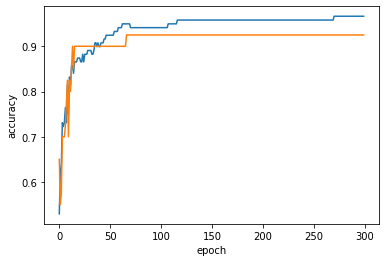

In [33]:
# 과소, 과대적합 그래프 그려보기

import numpy as np
sc = SGDClassifier(loss='log' , random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    sc.partial_fit(train_scaled , train_target , classes = classes )
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

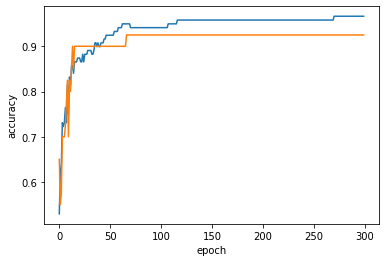

In [34]:
import numpy as np 
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)
for i in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [35]:
# SGDClassifier 의 반복횟수를 100에 맞추고 모델 훈련
sc = SGDClassifier(loss='log', max_iter = 100 , tol=None, random_state= 42)
sc.fit(train_scaled, train_target)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [36]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [37]:
sc = SGDClassifier(loss='hinge', max_iter= 100 , tol = None , random_state =42)
sc.fit(train_scaled , train_target)
print(sc.score(train_scaled, train_target), sc.score(test_scaled,test_target))

0.9495798319327731 0.925
